In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the data files
traffic_violations = pd.read_csv('../../../resources/traffic_violations_filtered.csv')
us_accidents = pd.read_csv('../../../resources/us_accidents_filtered_rows.csv')
us_temperature = pd.read_csv('../../../resources/dataset_weather/us_temperature.csv')

traffic_violations['Accident'] = traffic_violations['Accident'].map({'Yes': 1, 'No': 0})
traffic_violations['Belts'] = traffic_violations['Belts'].map({'Yes': 1, 'No': 0})
traffic_violations['Personal Injury'] = traffic_violations['Personal Injury'].map({'Yes': 1, 'No': 0})
traffic_violations['Fatal'] = traffic_violations['Fatal'].map({'Yes': 1, 'No': 0})
traffic_violations['Alcohol'] = traffic_violations['Alcohol'].map({'Yes': 1, 'No': 0})
traffic_violations['Work Zone'] = traffic_violations['Work Zone'].map({'Yes': 1, 'No': 0})
traffic_violations['Contributed To Accident'] = traffic_violations['Contributed To Accident'].map({'Yes': 1, 'No': 0})

us_accidents['Astronomical_Twilight'] = us_accidents['Astronomical_Twilight'].map({'Day' : 1, 'Night' : 0})
us_accidents['Civil_Twilight'] = us_accidents['Civil_Twilight'].map({'Day' : 1, 'Night' : 0})
us_accidents['Nautical_Twilight'] = us_accidents['Nautical_Twilight'].map({'Day' : 1, 'Night' : 0})

# Convert date columns to datetime
date_format = '%Y-%m-%d'
us_accidents['Start_Time'] = pd.to_datetime(us_accidents['Start_Time'], format= "%Y-%m-%d %H:%M:%S")
traffic_violations['Date Of Stop'] = pd.to_datetime(traffic_violations['Date Of Stop'], format= date_format)
us_temperature['datetime'] = pd.to_datetime(us_temperature['datetime'], format= "%d-%m-%y %H:%M")

# Extract date parts for aggregation
us_accidents['Date'] = us_accidents['Start_Time'].dt.date
traffic_violations['Date'] = traffic_violations['Date Of Stop'].dt.date
us_temperature['Date'] = us_temperature['datetime'].dt.date

# Aggregate data by date and state
us_accidents_agg = us_accidents.groupby(['Date']).agg({
    'Severity': 'mean', 
    'Distance(mi)': 'sum'
}).reset_index()

traffic_violations_agg = traffic_violations.groupby(['Date', 'State']).agg({
    'Accident': 'sum',
    'Belts': 'sum',
    'Personal Injury': 'sum',
    'Fatal': 'sum',
    'Alcohol': 'sum',
    'Work Zone': 'sum',
    'Contributed To Accident': 'sum'
}).reset_index()

us_accidents_agg = us_accidents.groupby(['Date']).agg({
    'Severity': 'mean', 
    'Distance(mi)': 'sum'
}).reset_index()

us_temperature_agg = us_temperature.groupby(['Date']).agg({
    'Portland': 'sum'
})

# Merge datasets on date
merged_data = pd.merge(us_accidents_agg, traffic_violations_agg, on='Date', how='inner')

d_merged_data = pd.merge(merged_data, us_temperature_agg, on='Date', how='inner')

# Compute correlation matrix
correlation_matrix = d_merged_data.corr(numeric_only= True)

correlation_matrix


,Severity,Distance(mi),Accident,Belts,Personal Injury,Fatal,Alcohol,Work Zone,Contributed To Accident,Portland
Severity,1.000000,-0.420149,NaN,0.022570,-0.010710,-0.000097,-0.020523,-0.012532,-0.014387,-0.169112
Distance(mi),-0.420149,1.000000,NaN,0.008919,0.009463,0.036443,0.010670,0.020209,0.023507,-0.050620
Accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belts,0.022570,0.008919,NaN,1.000000,0.578927,0.095030,0.289207,0.122689,0.676409,-0.007764
Personal Injury,-0.010710,0.009463,NaN,0.578927,1.000000,0.201036,0.214151,0.076302,0.756831,-0.007597
Fatal,-0.000097,0.036443,NaN,0.095030,0.201036,1.000000,0.057097,-0.002994,0.131413,-0.048716
Alcohol,-0.020523,0.010670,NaN,0.289207,0.214151,0.057097,1.000000,0.120395,0.285480,0.001078
Work Zone,-0.012532,0.020209,NaN,0.122689,0.076302,-0.002994,0.120395,1.000000,0.116186,0.003422
Contributed To Accident,-0.014387,0.023507,NaN,0.676409,0.756831,0.131413,0.285480,0.116186,1.000000,-0.000110
Portland,-0.169112,-0.050620,NaN,-0.007764,-0.007597,-0.048716,0.001078,0.003422,-0.000110,1.000000


In [31]:
traffic_violations['Accident'] = traffic_violations['Accident'].map({'Yes': 1, 'No': 0})
traffic_violations['Belts'] = traffic_violations['Belts'].map({'Yes': 1, 'No': 0})
traffic_violations['Personal Injury'] = traffic_violations['Personal Injury'].map({'Yes': 1, 'No': 0})
traffic_violations['Fatal'] = traffic_violations['Fatal'].map({'Yes': 1, 'No': 0})
traffic_violations['Alcohol'] = traffic_violations['Alcohol'].map({'Yes': 1, 'No': 0})
traffic_violations['Work Zone'] = traffic_violations['Work Zone'].map({'Yes': 1, 'No': 0})
traffic_violations['Contributed To Accident'] = traffic_violations['Contributed To Accident'].map({'Yes': 1, 'No': 0})

df_accidents['Astronomical_Twilight'] = df_accidents['Astronomical_Twilight'].map({'Day' : 1, 'Night' : 0})
df_accidents['Civil_Twilight'] = df_accidents['Civil_Twilight'].map({'Day' : 1, 'Night' : 0})
df_accidents['Nautical_Twilight'] = df_accidents['Nautical_Twilight'].map({'Day' : 1, 'Night' : 0})

df_accidents.corr(numeric_only = True)
traffic_violations.corr(numeric_only = True)

,Accident,Belts,Personal Injury,Fatal,Alcohol,Work Zone,Contributed To Accident
Accident,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belts,NaN,1.000000,0.105187,0.000819,0.001639,0.002439,0.074504
Personal Injury,NaN,0.105187,1.000000,-0.001674,0.015309,0.004872,0.344299
Fatal,NaN,0.000819,-0.001674,1.000000,-0.000605,-0.000216,0.037125
Alcohol,NaN,0.001639,0.015309,-0.000605,1.000000,-0.000590,0.017778
Work Zone,NaN,0.002439,0.004872,-0.000216,-0.000590,1.000000,-0.001092
Contributed To Accident,NaN,0.074504,0.344299,0.037125,0.017778,-0.001092,1.000000


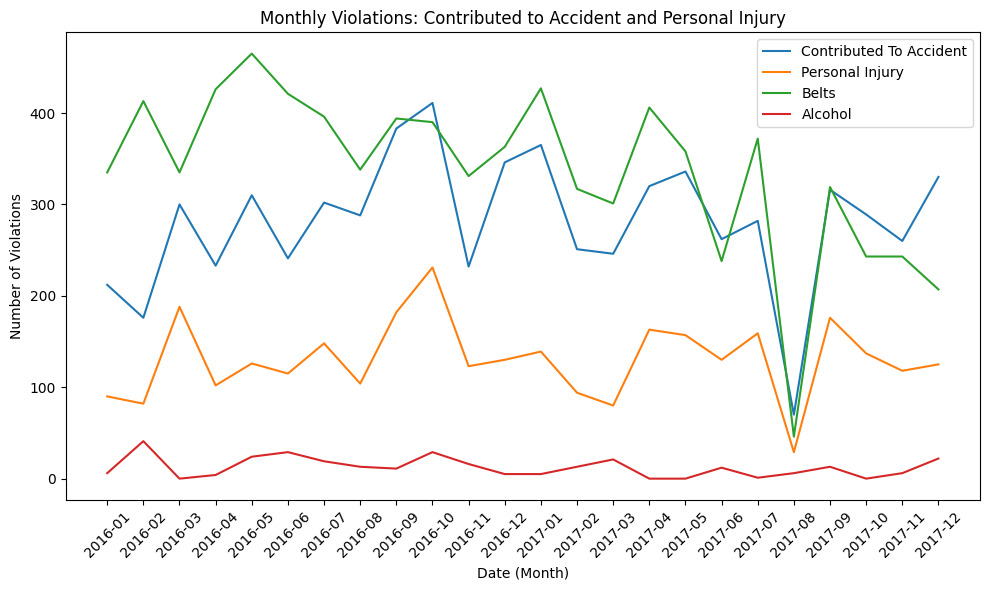

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame
df = pd.read_csv('../../../resources/traffic_violations_filtered.csv')


# Convert 'Date Of Stop' to datetime
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

# Extract year and month from 'Date Of Stop'
df['YearMonth'] = df['Date Of Stop'].dt.to_period('M')

# Create binary columns for 'Contributed To Accident' and 'Alcohol'
df['Contributed To Accident'] = df['Contributed To Accident'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Personal Injury'] = df['Personal Injury'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Belts'] = df['Belts'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Alcohol'] = df['Alcohol'].apply(lambda x: 1 if x == 'Yes' else 0)

# Group by YearMonth and sum the violations
monthly_data = df.groupby('YearMonth')[['Contributed To Accident', 'Personal Injury', 'Belts', 'Alcohol']].sum()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index.astype(str), monthly_data['Contributed To Accident'], label='Contributed To Accident')
plt.plot(monthly_data.index.astype(str), monthly_data['Personal Injury'], label='Personal Injury')
plt.plot(monthly_data.index.astype(str), monthly_data['Belts'], label='Belts')
plt.plot(monthly_data.index.astype(str), monthly_data['Alcohol'], label='Alcohol')
plt.xlabel('Date (Month)')
plt.ylabel('Number of Violations')
plt.title('Monthly Violations: Contributed to Accident and Personal Injury')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv('../../../resources/traffic_violations_filtered.csv')
# Convert 'Date Of Stop' to datetime
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'])

# Extract year and month from 'Date Of Stop'
df['YearMonth'] = df['Date Of Stop'].dt.to_period('M')

# Create binary columns for 'Contributed To Accident' and 'Alcohol'
df['Contributed To Accident'] = df['Contributed To Accident'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Personal Injury'] = df['Personal Injury'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Belts'] = df['Belts'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Alcohol'] = df['Alcohol'].apply(lambda x: 1 if x == 'Yes' else 0)



# Group by YearMonth and sum the violations
monthly_data = df.groupby('YearMonth')[['Contributed To Accident', 'Personal Injury', 'Belts', 'Alcohol']].sum().reset_index()

# Convert 'YearMonth' to string for Plotly
monthly_data['YearMonth'] = monthly_data['YearMonth'].astype(str)

# Plotting the data
fig = px.line(monthly_data, x='YearMonth', y=['Contributed To Accident', 'Personal Injury', 'Belts', 'Alcohol'], 
              labels={'value':'Number of Violations', 'YearMonth':'Date (Month)'},
              title='Monthly Violations')

# fig.add_trace(go.Scatter(x=monthly_data['YearMonth'], y=monthly_data['Contributed To Accident'],
#                          mode='lines', name='Alcohol',
#                          line=dict(color='red', width=4)))  # Highlight

fig.show()


In [5]:
def code(file_path, output):
    df = pd.read_csv(file_path)

    df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'], errors='coerce')

    new_data = df[df['Date Of Stop'].dt.year.isin([2016, 2017])]

    new_data.to_csv(output, index=False)


code('../resources/traffic_violations.csv', '../resources/traffic_violations_filtered.csv')